# Allgemeine IIR-Struktur

Dieses Notebook zur Übung "Allgemeine IIR-Struktur" zeigt Betragsgang, Impulsantwort und P/N Diagramm von IIR-Systemen erster und zweiter Ordnung.

In [1]:
import numpy as np
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, 
                   linspace, array, zeros, ones)
import scipy.signal as sig

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')
import dsp_fpga_lib as dsp

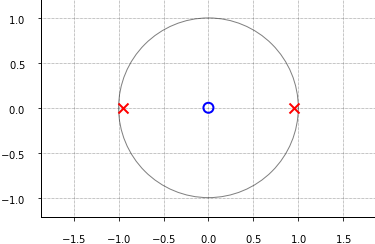

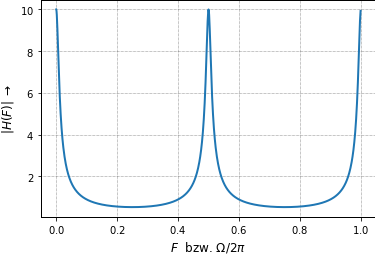

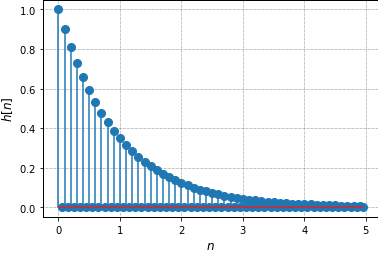

In [9]:
alpha = 0.9; f_S = 1 
b = [1, 0] # z + 0
# b = [1, 0, 0] # z^2 + 0
a = [1, -alpha] # z - 0.9; Add., 1 Verzögerung
#a = [1, +alpha] # z + 0.9; Subtr., 1 Verz.
a = [1, 0, -alpha] # z^2 - 0.9; Add., 2 Verz.
#a = [1, 0, +alpha] # z^2 - 0.9; Subtr., 2 Verz.

fig1, ax1 = plt.subplots(1)
dsp.zplane(b, a, plt_ax = ax1)  # Plotte P/N Diagramm

# H(f) entlang der oberen Hälfte des EK:
fig2, ax2 = plt.subplots(1)
[W,H] = sig.freqz(b,a,1024, f_S)
ax2.plot(W/(2*pi), abs(H), linewidth = 2) # H(F)
ax2.set_xlabel(r'$F$  bzw. $\Omega / 2 \pi$') 
ax2.set_ylabel(r'$|H(F)| \; \rightarrow$')

fig3, ax3 = plt.subplots(1)
[himp,t] = dsp.impz(b,a,20,f_S) 
(ml, sl, bl) = ax3.stem(t,himp,use_line_collection=True) # Impulsantwort
#plt.setp(ml,'markerfacecolor','r','markersize',8)
#plt.setp(sl,'linewidth',2)
ax3.set_xlabel('$n$'); ax3.set_ylabel(r'$h[n]$');

### Aufgaben
- Experimentieren Sie mit verschiedenen Längen für das MA-Filter, interpretieren Sie die Ergebnisse. Was passiert beim MA-Filter der Ordnung $N=3$?
- Lesen Sie die Unterdrückung des Gleichsignals aus den Betragsgang ab. Korrigieren Sie ggf. den Skalierungsfehler für DC-Signale im Code.

***
### Copyright

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.